# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Curtis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by='popularity')

In [5]:
print(f"Total articles about btc: {btc_headlines['totalResults']}")

Total articles about btc: 8840


In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="etherium", language="en", sort_by='popularity')

In [7]:
print(f"Total articles about eth: {eth_headlines['totalResults']}")

Total articles about eth: 30


In [8]:
# Create the Bitcoin sentiment scores DataFrame


btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-10,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.000,0.779
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
2,2021-11-04,Image: Cash App\r\n\n \n\n Square has announce...,0.4767,0.075,0.000,0.925
3,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.000,1.000
4,2021-10-15,Steam is banning games that are built on block...,0.2263,0.056,0.000,0.944


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])



eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-01,"Angelina Lee is an expert in JavaScript, TypeS...",-0.2960,0.000,0.061,0.939
1,2021-10-20,AppleInsider is supported by its audience and ...,0.4588,0.121,0.000,0.879
2,2021-11-01,"Just last year, the four thirty-somethings beh...",-0.2732,0.000,0.062,0.938
3,2021-11-05,When the largest Islamic organization in Indon...,0.1280,0.049,0.000,0.951
4,2021-10-28,Never bet against American ingenuity and innov...,-0.1531,0.075,0.092,0.833


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.133425,0.041800,0.009050,0.949150
std,0.343537,0.068625,0.029249,0.069055
min,-0.648600,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.911500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.385600,0.077750,0.000000,1.000000
max,0.817600,0.221000,0.118000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.337075,0.108650,0.028750,0.862600
std,0.359021,0.080991,0.037478,0.091844
min,-0.296000,0.000000,0.000000,0.675000
25%,0.096000,0.063250,0.000000,0.821750
50%,0.360900,0.109000,0.000000,0.865000
75%,0.624400,0.142750,0.061250,0.933500
max,0.918400,0.270000,0.098000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BEtherium (ETH) had the highest mean positive score - 0.108650

Q: Which coin had the highest compound score?

A: Etherium (ETH) had the highest compound score - 0.918400

Q. Which coin had the highest positive score?

A: Etherium (ETH) had the highest postive score - 0.270000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
     
    return output

In [15]:
# Create a new tokens column for Bitcoin
btc_text = btc_df['text']

btc_tokens = []

for text in btc_df['text']:
    tokens = tokenizer(text)

    btc_tokens.append(tokens)
                 
btc_df['tokens'] = btc_tokens
btc_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-11-10,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.000,0.779,"[crypto, reward, card, small, percentage, purc..."
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
2,2021-11-04,Image: Cash App\r\n\n \n\n Square has announce...,0.4767,0.075,0.000,0.925,"[image, cash, app, square, ha, announced, peop..."
3,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.000,1.000,"[new, crosschain, bridge, currently, connected..."
4,2021-10-15,Steam is banning games that are built on block...,0.2263,0.056,0.000,0.944,"[steamis, banning, game, built, blockchain, te..."


In [16]:
# Create a new tokens column for Ethereum
eth_text = eth_df['text']

eth_tokens = []

for text in eth_df['text']:
    tokens = tokenizer(text)

    eth_tokens.append(tokens)
                 
eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-01,"Angelina Lee is an expert in JavaScript, TypeS...",-0.2960,0.000,0.061,0.939,"[angelina, lee, expert, javascript, typescript..."
1,2021-10-20,AppleInsider is supported by its audience and ...,0.4588,0.121,0.000,0.879,"[appleinsider, supported, audience, may, earn,..."
2,2021-11-01,"Just last year, the four thirty-somethings beh...",-0.2732,0.000,0.062,0.938,"[last, year, four, thirtysomethings, behind, b..."
3,2021-11-05,When the largest Islamic organization in Indon...,0.1280,0.049,0.000,0.951,"[largest, islamic, organization, indonesia, la..."
4,2021-10-28,Never bet against American ingenuity and innov...,-0.1531,0.075,0.092,0.833,"[never, bet, american, ingenuity, innovation, ..."


---

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = []
for tokens in btc_df['tokens']:
    bigrams_count = dict(Counter(ngrams(tokens, n=2)))
    btc_bigrams.append(bigrams_count.items())
btc_bigrams

[dict_items([(('crypto', 'reward'), 1), (('reward', 'card'), 1), (('card', 'small'), 1), (('small', 'percentage'), 1), (('percentage', 'purchase'), 1), (('purchase', 'redeemed'), 1), (('redeemed', 'cryptocurrency'), 1), (('cryptocurrency', 'instead'), 1), (('instead', 'cash'), 1), (('cash', 'back'), 1), (('back', 'point'), 1), (('point', 'redeemable'), 1), (('redeemable', 'reward'), 1), (('reward', 'portalthat'), 1), (('portalthat', 'mean'), 1), (('mean', 'purchas'), 1), (('purchas', 'char'), 1)]),
 dict_items([(('similar', 'hoax'), 1), (('hoax', 'earlier'), 1), (('earlier', 'year'), 1), (('year', 'tied'), 1), (('tied', 'walmart'), 1), (('walmart', 'litecoinif'), 1), (('litecoinif', 'buy'), 1), (('buy', 'something'), 1), (('something', 'verge'), 1), (('verge', 'link'), 1), (('link', 'vox'), 1), (('vox', 'media'), 1), (('media', 'may'), 1), (('may', 'earn'), 1), (('earn', 'commission'), 1), (('commission', 'see'), 1), (('see', 'ethic'), 1), (('ethic', 'statementphoto'), 1), (('statement

In [17]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = []

for token in btc_df['tokens']:
    ngrams = dict(Counter(ngrams(tokens, n=2)))
    btc_ngrams.append(ngrams)

btc_ngrams

btc_ngram_counts = []
for tokens in btc_df['tokens']:
    ngrams_count = dict(Counter(ngrams_count(tokens, n=2)))
    btc_ngram_counts.append(ngrams_count.items())
btc_ngram_counts

TypeError: 'dict' object is not callable

In [19]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = []
for tokens in eth_df['tokens']:
    bigrams_count = dict(Counter(ngrams(tokens, n=2)))
    eth_bigrams.append(bigrams_count.items())
eth_bigrams

[dict_items([(('angelina', 'lee'), 1), (('lee', 'expert'), 1), (('expert', 'javascript'), 1), (('javascript', 'typescript'), 1), (('typescript', 'nodejs'), 1), (('nodejs', 'react'), 1), (('react', 'ai'), 1), (('ai', 'mia'), 1), (('mia', 'khalifa'), 1), (('khalifa', 'worked'), 1), (('worked', 'instagram'), 1), (('instagram', 'wa'), 1), (('wa', 'team'), 1), (('team', 'coffee'), 1), (('coffee', 'maker'), 1), (('maker', 'mined'), 1), (('mined', 'etherium'), 1), (('etherium', 'company'), 1), (('company', 'server'), 1), (('server', 'gr'), 1), (('gr', 'char'), 1)]),
 dict_items([(('appleinsider', 'supported'), 1), (('supported', 'audience'), 1), (('audience', 'may'), 1), (('may', 'earn'), 1), (('earn', 'commission'), 1), (('commission', 'amazon'), 1), (('amazon', 'associate'), 1), (('associate', 'affiliate'), 1), (('affiliate', 'partner'), 1), (('partner', 'qualifying'), 1), (('qualifying', 'purchase'), 1), (('purchase', 'affiliate'), 1), (('affiliate', 'partnership'), 1), (('partnership', 'i

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
btc_wordmap = {}
for btc_token in btc_df['tokens']:
    top = dict(token_count(btc_token, 10))
    for key in top:
        if(key in btc_wordmap):
            btc_wordmap[key] += top[key]
        else:
            btc_wordmap[key] = top[key]
btc_word_list = list(btc_wordmap.items())
x = sorted(btc_word_list, key=lambda x:x[1], reverse=True)
btc_top_10 = []

for i in range(0,10):
    btc_top_10.append(x[i])
btc_top_10

In [ ]:
# Use token_count to get the top 10 words for Ethereum
eth_wordmap = {}
for eth_token in eth_df['tokens']:
    top = dict(token_count(eth_token, 10))
    for key in top:
        if(key in eth_wordmap):
            eth_wordmap[key] += top[key]
        else:
            eth_wordmap[key] = top[key]
eth_word_list = list(eth_wordmap.items())
x = sorted(eth_word_list, key=lambda x:x[1], reverse=True)
eth_top_10 = []

for i in range(0,10):
    eth_top_10.append(x[i])
eth_top_10

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

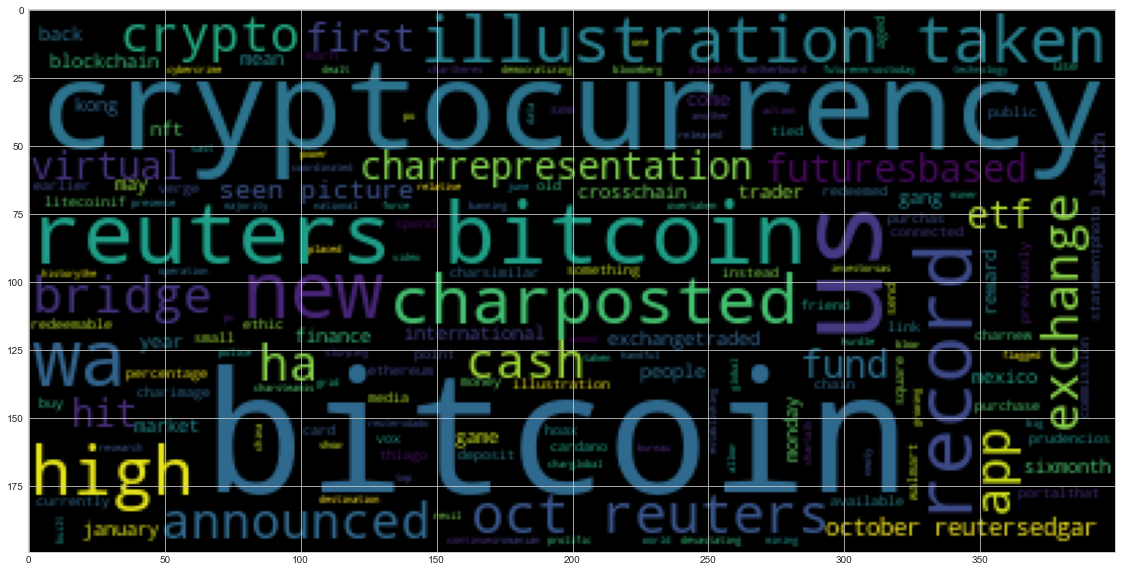

In [26]:
# Generate the Bitcoin word cloud
btc_text_list = []
for btc_tokens in btc_df['tokens']:
    btc_text_list.append(" ".join(btc_tokens))
text = ""
for i in btc_text_list:
    text += i
btc_word_cloud = WordCloud().generate(text)
plt.imshow(btc_word_cloud)

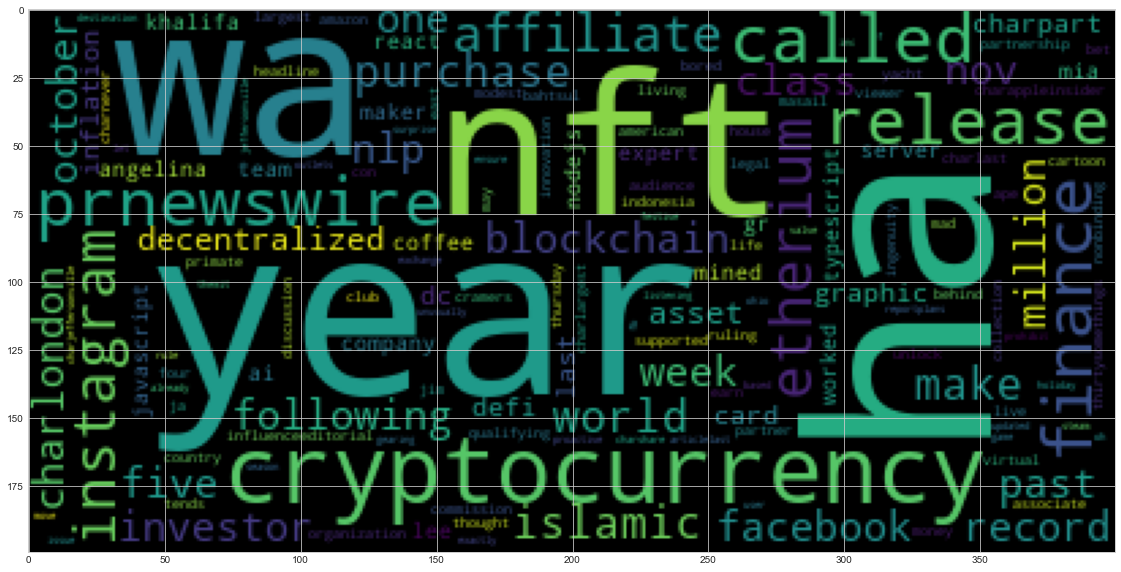

In [27]:
# Generate the Ethereum word cloud
eth_text_list = []
for eth_tokens in eth_df['tokens']:
    eth_text_list.append(" ".join(eth_tokens))
text = ""
for i in eth_text_list:
    text += i
eth_word_cloud = WordCloud().generate(text)
plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
btc_text = ""
for text in btc_df['text']:
    btc_text += text
btc_text

'With crypto rewards cards, a small percentage of your purchases can be redeemed for cryptocurrency instead of cash back or points that are redeemable in a rewards portalthat means 1-2% of all purchas… [+3232 chars]A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Image: Cash App\r\n\n \n\n Square has announced that people over 13 years old can use Cash App to deposit and spend money or send it to friends. The app was previously only available to people aged 18 or … [+1854 chars]A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]Steam\xa0is banning games that are built on blockchain technology or that allow the exchange of cryptocurrency and NFTs, establis

In [32]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin (BTC) text analysis"

In [33]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [34]:
# List all Entities
btc_doc.ents

(1-2%,
 earlier this year,
 Verge,
 Vox Media,
 Thiago Prudencio/S,
 Square,
 13 years old,
 18,
 Ethereum,
 Cardano,
 Nervos ,
 today,
 the Force Bridge,
 NFT,
 U.S.,
 U.S.,
 China,
 Bitcoin,
 Bloomberg,
 the National Bureau,
 Monday,
 Romanian,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/IllustrationHONG KONG,
 Oct 21,
 Reuters,
 October 19, 2021,
 REUTERS,
 Edgar SuLONDON,
 Oct 20,
 Reuters,
 October 19, 2021,
 REUTERS,
 Edgar SuHONG KONG,
 Oct 20,
 Reuters,
 Wednesday,
 first,
 U.S.,
 Conway G. Gittens,
 October 18, 2021,
 REUTERS,
 Edgar SuSINGAPORE,
 Oct 19,
 Reuters,
 six-month,
 Reuters,
 Reuters,
 six-month,
 Tuesday,
 U.S.,
 ETF,
 Mexican,
 Volaris,
 Benito Juarez International Airport,
 Mexico City,
 Mexico,
 January 10, 2018,
 January 10, 2018,
 68,000,
 $5k,
 CoinGecko,
 more than $3 trillion,
 Jamie Dimon,
 JPMorgan Chase &amp,
 Monday,
 the Institute of International Finance,
 60,000,
 first,
 six months,
 Friday,
 U.S.,
 U.S.,
 this week)

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
eth_text = ""
for text in eth_df['text']:
    eth_text += text
eth_text

'Angelina Lee is an expert in JavaScript, TypeScript, Node.js, React AI, and Mia Khalifa. When she worked at Instagram, she was the "team coffee maker" and mined Etherium on company servers. Before gr… [+764 chars]AppleInsider is supported by its audience and may earn commission as an Amazon Associate and affiliate partner on qualifying purchases. These affiliate partnerships do not influence our editorial con… [+1056 chars]Just last year, the four thirty-somethings behind Bored Ape Yacht Club — a collection of 10,000 NFTs, which house cartoon primates and unlock the virtual world they live in — were living modest lifes… [+17054 chars]When the largest Islamic organization in Indonesia, the largest Islamic country, makes a ruling, it tends to make headlines. Following a "bahtsul masail," or non-binding legal discussion, the East Ja… [+4078 chars]Never bet against American ingenuity and innovation. Those were Jim Cramer\'s thoughts to his Mad Money viewers Thursday, after listening to Fa

In [36]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum (ETH) text analysis"

In [37]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [38]:
# List all Entities
eth_doc.ents

(Angelina Lee,
 JavaScript,
 Node.js,
 React AI,
 Mia Khalifa,
 Instagram,
 Amazon Associate,
 last year,
 four,
 thirty,
 Bored Ape Yacht Club,
 10,000,
 Islamic,
 Indonesia,
 Islamic,
 American,
 Jim Cramer's,
 Thursday,
 Facebook's  (FB) -,
 Last week,
 +9739 chars]JEFFERSONVILLE,
 Ohio,
 Nov. 11, 2021,
 Jeffersonville,
 OH,
 2021,
 Nov. 5, 2021,
 the past couple of years,
 Oct. 29, 2021,
 the past year,
 One,
 Beeple,
 NFT,
 $69 million,
 Christies,
 five years,
 The Dillinger Escape Plan’s,
 Dissociation,
 October 14, 2016,
 five years,
 Learning,
 Natural Language Processing,
 Some time ago,
 NLP,
 Kaggle,
 Quora Question,
 Wednesday, October 27,
 $2.48 trillion,
 Shiba Inu,
 277,
 one,
 Friday,
 $5.75 million,
 DC FanDome,
 last month,
 DC,
 NFT,
 YouTube,
 Instagram,
 Japan,
 eight-year-old,
 DeFi,
 DeFi,
 Gigabyte's,
 GeForce,
 LHR,
 GPU,
 Last week,
 8,
 Cryptocurrency-Widget,
 European,
 ten-year)

---